<a href="https://colab.research.google.com/github/namhawon/2025_Study03/blob/main/Chapter3_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망

퍼셉트론은 복잡한 함수도 이론상으로 표현할 수 있는 장점이 있지만, 원하는 출력을 얻기 위한 가중치 설정은 사람이 수동으로 해야 한다는 단점이 있었다. 신경망(Neural Network)은 이 문제를 해결하는데, 가중치 매개변수를 사람이 아닌 데이터로부터 자동으로 학습할 수 있는 능력을 갖추고 있다. 이번 장에서는 신경망의 개요와 입력 데이터를 식별하는 처리 과정을 설명하며, 가중치를 학습하는 방법은 다음 장에서 다룬다

# 3.1 퍼셉트론에서 신경망으로

신경망은 퍼셉트론과 구조적으로 유사하지만, 차이점에 주목할 필요가 있다. 신경망은 입력층, 은닉층, 출력층으로 구성되며, 은닉층은 외부에서 관찰되지 않기 때문에 ‘은닉’이라고 불린다. 층의 번호는 파이썬 배열처럼 0부터 시작하여 입력층은 0층, 은닉층은 1층, 출력층은 2층으로 구분한다

**[그림3-1] 신경망의 예**

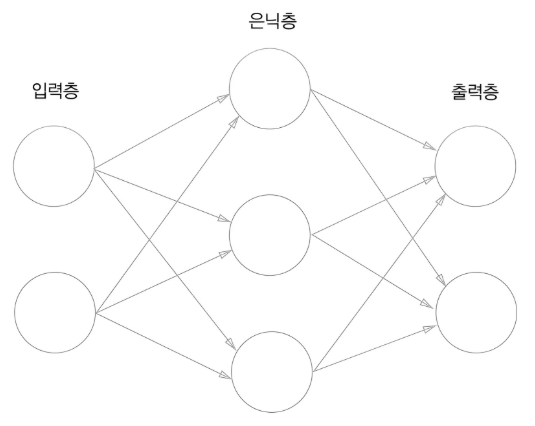

[그림 3-1]의 신경망은 총 3개의 층으로 구성되어 있지만, 가중치를 갖는 층은 은닉층과 출력층 두 개뿐이므로 이를 '2층 신경망'이라고 한다. 일부 문헌에서는 층의 총 개수를 기준으로 '3층 신경망'이라고 하기도 하므로 주의가 필요하다. 이 책에서는 가중치를 갖는 층의 수를 기준으로 층 수를 정의한다. 구조적으로는 퍼셉트론과 크게 다르지 않으며, 뉴런 간의 연결 방식도 동일하다. 이제 신경망에서는 신호가 어떻게 전달되는지를 살펴본다

# 3.1.2 퍼셉트론 복습

**[그림 3-2] 퍼셉트론 복습**

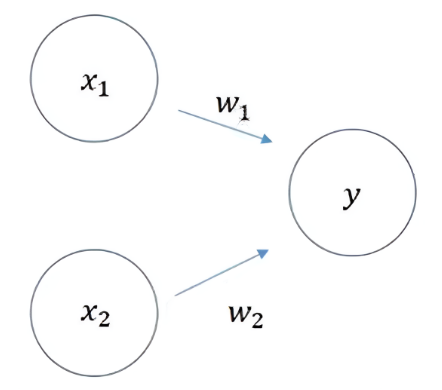

**[식 3.1]**

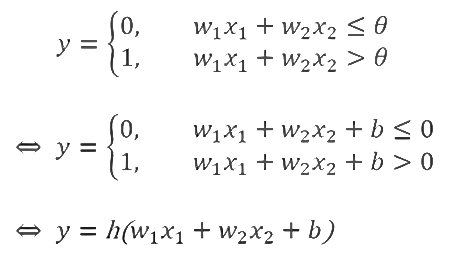

퍼셉트론은 입력 신호 1, 2를 받아 출력 y를 생성한다. 이 동작은 수식으로 표현되며, 입력 신호에 가중치 W1, W2를 곱하고 편향 b를 더한 값이 0보다 크면 출력은 1, 그렇지 않으면 0이 된다. 여기서 편향 b는 뉴런이 얼마나 쉽게 활성화되는지를 조절하고, 가중치 W1, W2는 각 입력 신호가 결과에 미치는 영향을 조절한다. 그림에는 편향 b가 명시되지 않았지만, 이를 포함하면 다음 그림처럼 표현할 수 있다

**[식 3.1]**

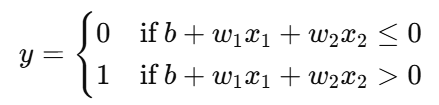

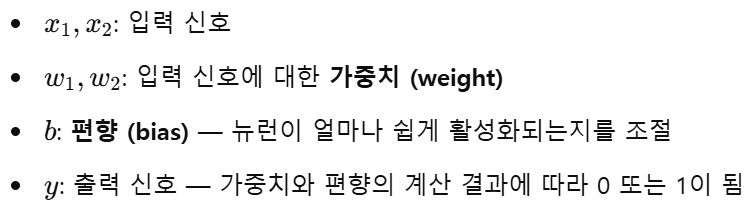

**[그림 3-3] 편향을 명시한 퍼셉트론**

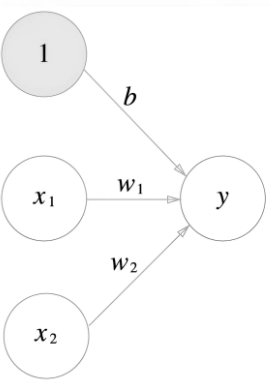

그림 3-3에서는 가중치가 b이고 입력이 항상 1인 뉴런이 추가되었다. 이 퍼셉트론에는 세 개의 입력 신호, 즉 x₁, x₂, 그리고 편향을 위한 상수 1이 입력된다. 각각의 신호는 대응되는 가중치와 곱해진 후 다음 뉴런으로 전달되며, 뉴런에서는 이 값들을 모두 더한다. 그 합이 0을 초과하면 출력은 1이 되고, 0 이하이면 출력은 0이 된다. 참고로, 편향 입력은 항상 1이기 때문에 그림에서는 해당 뉴런을 회색으로 표시하여 다른 뉴런과 구별하였다

이제 퍼셉트론의 계산식을 더 간단한 형태로 다시 표현해보자. 조건 분기(입력이 0을 넘으면 1, 그렇지 않으면 0)를 하나의 함수로 나타내면 표현이 간결해진다. 이 함수를 **h(x)**라고 하면, 퍼셉트론의 동작은 입력 신호들의 가중합을 구하고, 그 값을 함수 h에 통과시켜 출력값을 정하는 구조로 정리할 수 있다. h는 입력이 0을 넘으면 1을 반환하고, 그렇지 않으면 0을 반환한다. 결과적으로 퍼셉트론이 수행하는 계산은 모두 이 함수 h와 덧셈, 곱셈으로 표현할 수 있다

**[식 3.2]**

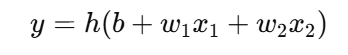

**[식 3.3]**

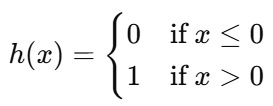

**3.1.3 활성화 함수의 등장**

조금 전 등장한 h(x) 함수처럼, 입력 신호의 총합을 출력 신호로 변환하는 함수를 활성화 함수라고 한다. '활성화'라는 표현처럼, 이 함수는 입력 신호의 총합이 뉴런을 활성화할지 여부를 결정하는 역할을 한다. 식 3.2는 입력 신호에 가중치를 곱하고 이를 모두 더해 총합을 계산한 뒤, 그 합을 활성화 함수에 넣어 최종 출력을 얻는 과정을 나타낸다. 이 과정은 두 단계로 나눌 수 있다. 첫 번째 단계는 입력 신호의 가중합을 계산하는 것이고, 두 번째 단계는 그 결과를 활성화 함수에 통과시켜 출력값을 결정하는 것이다

**[식 3.4]**

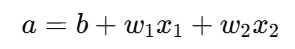

**[식 3.5]**

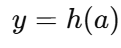

식 3.4는 가중치가 곱해진 입력 신호들과 편향을 모두 더한 값을 계산하며, 이 값을 a라고 한다. 식 3.5는 a를 함수 h()에 입력하여 최종 출력값 y를 구하는 과정을 나타낸다. 이러한 흐름을 큰 원으로 뉴런을 그리는 방식으로 표현하면, 식 3.4와 식 3.5는 그림 3-4처럼 시각적으로 나타낼 수 있다

**[그림 3-4] 활성화 함수의 처리 과정**

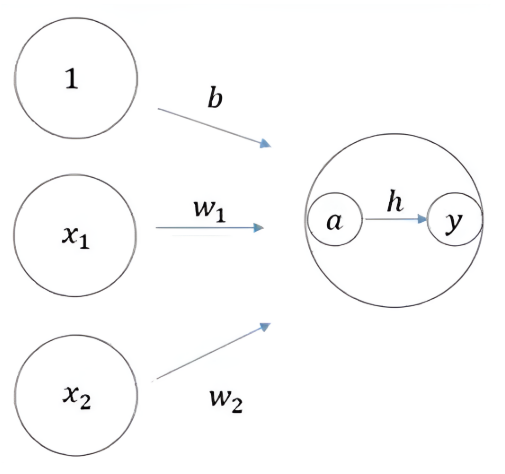

그림 3-4에서는 기존보다 뉴런의 원을 더 크게 그려, 그 안에 활성화 함수의 처리 과정을 명확하게 표현하였다. 입력 신호에 가중치를 곱한 후 합산한 값은 a라는 노드로 나타내고, 이 a가 활성화 함수 h()를 거쳐 y라는 출력 노드로 변환되는 흐름이 시각적으로 드러나 있다. 이 책에서는 뉴런과 노드를 같은 의미로 사용하므로, a와 y를 각각 노드라고 부르지만 이는 지금까지 뉴런이라고 표현한 개념과 동일하다. 보통 뉴런은 그림 3-5의 왼쪽처럼 하나의 원으로 단순하게 그리지만, 신경망의 내부 동작 과정을 더 명확히 설명할 필요가 있을 때는 오른쪽처럼 활성화 처리 과정을 분리해 표현하기도 한다

이제 활성화 함수에 대해 좀 더 깊이 이해해보려 한다. 활성화 함수는 퍼셉트론에서 신경망으로 넘어가기 위한 중요한 연결 고리이다.

이 책에서는 '퍼셉트론'이라는 용어를 엄밀하게 하나의 알고리즘으로만 제한하지는 않는다. 일반적으로 단순 퍼셉트론은 계단 함수를 활성화 함수로 사용하는 모델을 의미하며, 이는 입력값이 특정 경계를 기준으로 출력이 바뀌는 구조이다. 반면, 다층 퍼셉트론은 여러 층으로 구성되고, 시그모이드 함수와 같은 매끄러운 형태의 활성화 함수를 사용하는 신경망 모델을 의미한다

# 3.2 활성화 함수

식 3.3과 같은 활성화 함수는 임계값을 기준으로 출력이 바뀌는 형태로, 이를 계단 함수라고 한다. 따라서 퍼셉트론은 활성화 함수로 계단 함수를 사용하는 모델이라고 할 수 있다. 즉, 다양한 활성화 함수 중 퍼셉트론은 계단 함수를 채택한 경우이다.

그렇다면 계단 함수가 아닌 다른 활성화 함수를 사용하면 어떻게 될까? 사실, 계단 함수를 다른 함수로 바꾸는 것이 신경망으로 나아가는 중요한 전환점이다. 이 과정이 신경망의 가능성을 여는 열쇠이며, 이어서 신경망에서 실제로 사용되는 여러 활성화 함수를 소개하게 된다

# 3.2.1 시그모이드 함수

시그모이드 함수는 신경망에서 자주 사용되는 활성화 함수 중 하나이다. 이 함수는 다음과 같은 수식으로 정의된다

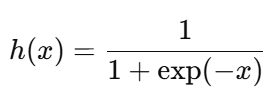

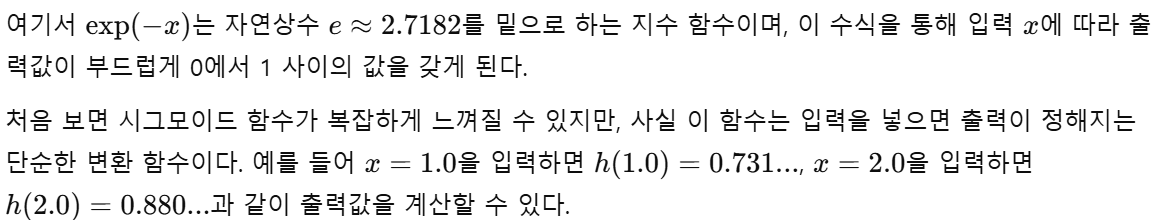

신경망에서는 활성화 함수로 시그모이드 함수를 사용하여 입력 신호를 변환하고, 이렇게 변환된 신호를 다음 뉴런으로 전달한다. 실제로 앞에서 다룬 퍼셉트론과 이후에 살펴볼 신경망 사이의 가장 큰 차이는 활성화 함수의 종류에 있다. 퍼셉트론에서는 계단 함수를 사용하고, 신경망에서는 시그모이드 함수와 같은 연속적이고 매끄러운 함수를 사용한다. 그 외에 뉴런이 여러 층으로 연결되는 구조나 신호를 전달하는 방식은 퍼셉트론과 기본적으로 동일하다. 이제 시그모이드 함수가 계단 함수와 어떻게 다른지 비교하며 자세히 살펴보게 된다

# 3.2.2 계단 함수 구현하기

이번 절에서는 계단 함수를 파이썬으로 구현하고, 그 결과를 시각적으로 확인해보는 과정을 다룬다. 계단 함수는 입력값이 0을 초과하면 1을 출력하고, 그렇지 않으면 0을 출력하는 함수로, 앞서 식 3.3에서 정의된 형태를 따른다

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

이 함수는 입력값으로 실수 하나만 받을 수 있으며, 예를 들어 step_function(3.0)처럼 사용 가능하다. 하지만 numpy 배열을 인수로 넣는 것은 불가능하다. 예를 들어 step_function(np.array([1.0, 2.0]))처럼 넘파이 배열을 넣으면 오류가 발생한다. 앞으로의 활용을 위해, 넘파이 배열도 처리할 수 있도록 함수를 다음과 같이 수정할 수 있다

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(int)

이 구현은 넘파이의 브로드캐스팅과 자료형 변환 기능을 이용한 것으로, 배열 전체에 대해 조건 연산을 수행하고 그 결과를 정수형 배열로 변환하는 방식이다. 간단해 보이지만 넘파이의 기능을 효과적으로 활용한 트릭이며, 다음 예제에서는 이 동작 원리를 직접 확인해본다

넘파이 배열에 부등호 연산을 적용하면, 배열의 각 원소에 대해 조건 판별이 이루어져 Boolean 값으로 이루어진 배열이 생성된다. 예를 들어, 배열 x = np.array([-1.0, 1.0, 2.0])에 x > 0 조건을 적용하면 y = array([False, True, True])라는 Boolean 배열이 생성된다. 이는 각 원소가 0보다 큰지 여부를 나타낸다. 그러나 계단 함수는 출력값으로 정수형 0 또는 1을 필요로 하므로, Boolean 배열을 정수형으로 변환해야 한다. 넘파이에서는 astype() 메서드를 이용해 자료형을 변환할 수 있다. 예를 들어 y = y.astype(int)처럼 사용하면 True는 1로, False는 0으로 변환되어 array([0, 1, 1])이 된다. 이것이 계단 함수 구현에서 사용된 넘파이의 간단한 트릭이다. 이제 앞에서 정의한 계단 함수를 시각적으로 확인하기 위해 그래프로 그려보자. 다음은 그에 필요한 파이썬 코드이다

# 3.2.3 계단 함수의 그래프

**[그림 3-6] 계단 함수 그래프**

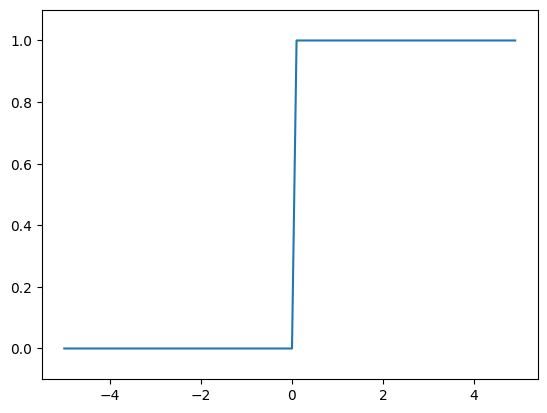

In [3]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축 범위 지정
plt.show()

여기서 np.arange(-5.0, 5.0, 0.1)은 -5.0부터 5.0 전까지 0.1 간격으로 배열을 생성하며, step_function()은 각 원소에 대해 계단 함수를 적용해 그 결과를 배열로 반환한다. 이렇게 생성된 x와 y 배열을 matplotlib로 시각화하면, 계단 모양의 그래프가 나타난다. 그래프를 보면, 입력이 0을 기준으로 출력이 0에서 1로 급격히 바뀌는 모습을 확인할 수 있다. 이러한 형상이 마치 계단처럼 생겼기 때문에 ‘계단 함수’라고 불리는 것이다

# 3.2.4 시그모이드 함수 구현하기

이번 절에서는 시그모이드 함수를 파이썬으로 구현한다. 식 3.6의 시그모이드 함수는 다음과 같은 코드로 작성할 수 있다

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

이때 np.exp(-x) 는 수학식 exp(-x)에 해당하며, 구현에 특별히 어려운 점은 없다. 다만, 인수 x 가 넘파이 배열이더라도 함수가 정상적으로 작동한다는 점을 기억해둘 필요가 있다. 예를 들어 다음과 같이 확인할 수 있다

In [6]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)
# 출력: array([0.26894142, 0.73105858, 0.88079708])

array([0.26894142, 0.73105858, 0.88079708])

이처럼 시그모이드 함수가 넘파이 배열도 제대로 처리할 수 있는 이유는 넘파이의 브로드캐스트 기능 덕분이다. 브로드캐스트란 넘파이 배열과 스칼라 값 간의 연산을 배열의 각 원소와 스칼라 값 간의 연산으로 자동 변환하여 수행하는 기능이다.
예를 들어 다음과 같은 연산을 수행하면,

In [7]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t  # 결과: array([2.0, 3.0, 4.0])
1.0 / t  # 결과: array([1.0, 0.5, 0.33333333])

array([1.        , 0.5       , 0.33333333])

이처럼 스칼라 값과 넘파이 배열 간의 연산은 각 원소에 대해 반복적으로 적용되어 결과가 배열로 반환된다. 시그모이드 함수에서도 np.exp(-x) 가 넘파이 배열을 반환하므로, 전체 수식 1 / (1 + np.exp(-x)) 각 원소에 대해 계산이 적용된다. 다음은 시그모이드 함수의 그래프를 그리는 코드이다. 이 그래프를 그리는 코드는 앞 절의 계단 함수 그래프 코드와 거의 동일하며, 다른 점은 출력 함수로 sigmoid()를 사용한 부분이다. 이 그래프를 통해 시그모이드 함수의 부드럽고 연속적인 출력 곡선을 시각적으로 확인할 수 있다

**[그림 3-7] 시그모이드 함수의 그래프**

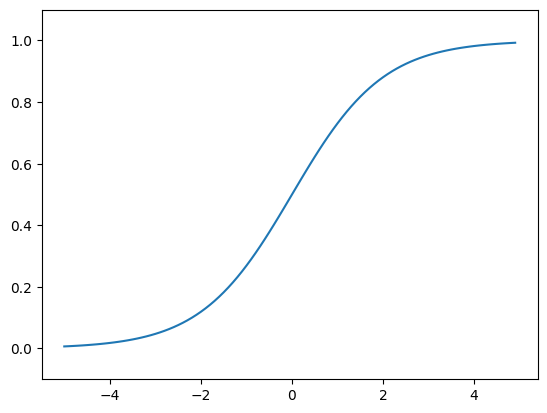

In [8]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축 범위 지정
plt.show()

# 3.2.5 시그모이드 함수와 계단 함수 비교

이 절에서는 시그모이드 함수와 계단 함수를 비교한다. 그림 3-8은 두 함수를 하나의 그래프에 함께 그린 것이다. 이를 통해 두 함수의 차이점과 공통된 성질이 무엇인지 생각해볼 수 있다.그림을 보면 계단 함수는 입력이 0을 기준으로 출력이 갑자기 변하는 반면, 시그모이드 함수는 부드럽고 연속적으로 출력이 변화한다. 두 함수 모두 출력값이 0에서 1 사이로 제한된다는 공통점이 있다

**[그림 3.8] 계단 함수(점선)와 시그모이드 함수(실선)**

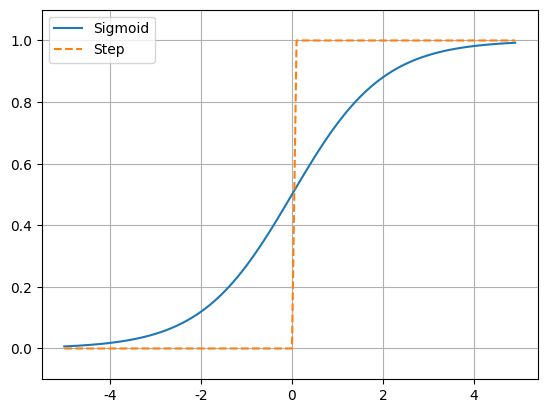

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 기본 폰트 설정 (한글 포함 범용 폰트로)
plt.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 함수 정의
def step_function(x):
    return np.array(x > 0, dtype=int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 데이터 준비
x = np.arange(-5.0, 5.0, 0.1)
y_step = step_function(x)
y_sigmoid = sigmoid(x)

# 그래프 그리기 (제목 없이)
plt.plot(x, y_sigmoid, label='Sigmoid', linestyle='-')
plt.plot(x, y_step, label='Step', linestyle='--')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()

그림 3-8을 보면 가장 먼저 느껴지는 차이는 함수의 매끄러움이다. 시그모이드 함수는 부드러운 곡선 형태로, 입력값이 변화함에 따라 출력도 연속적으로 변한다. 반면 계단 함수는 입력이 0을 기준으로 출력이 갑작스럽게 바뀌는 불연속적인 형태를 가진다. 시그모이드 함수의 이러한 매끄러움은 신경망 학습에서 매우 중요한 역할을 한다. 또한 두 함수는 출력값의 종류에서도 차이를 보인다. 계단 함수는 0 또는 1만을 출력하지만, 시그모이드 함수는 0.731이나 0.880처럼 0과 1 사이의 실수를 출력한다. 다시 말해, 퍼셉트론에서는 뉴런 사이에 0이나 1 같은 이진 신호가 전달되지만, 신경망에서는 연속적인 실수 신호가 전달된다. 이러한 차이를 비유하자면, 계단 함수는 ‘시시오도시’와 같고, 시그모이드 함수는 ‘물레방아’와 비슷하다고 할 수 있다. 시시오도시는 일정량의 물이 차야 물이 한 번에 쏟아지듯이 출력을 내지만, 물레방아는 물의 양에 비례해 천천히 회전하며 출력을 조절하는 방식이다. 한편, 두 함수는 공통점도 가지고 있다. 매끄러움에서는 차이를 보이지만, 전체적인 형태는 유사하다. 두 함수 모두 입력이 작을 때는 출력이 0(또는 0에 가까운 값)에 수렴하고, 입력이 커지면 출력이 1(또는 1에 가까운 값)에 수렴한다. 즉, 입력이 중요할수록 큰 값을, 중요하지 않을수록 작은 값을 출력하며, 출력값은 항상 0과 1 사이에 위치한다는 점이 두 함수의 공통된 성질이다

# 3.2.6 비선형 함수

계단 함수와 시그모이드 함수는 공통적으로 비선형 함수라는 특징을 가진다. 시그모이드 함수는 곡선 형태이며, 계단 함수는 꺾인 직선 형태지만, 둘 다 직선 하나로 표현할 수 없기 때문에 비선형 함수로 분류된다. 함수에 대해 이야기할 때 선형 함수와 비선형 함수라는 개념이 자주 등장한다. 함수는 입력값에 따라 출력값을 반환하는 변환기이며, 선형 함수는 입력이 변할 때 출력도 일정한 비율로 변하는 함수이다. 일반적으로 수식으로는 f(x) = ax + b의 형태로 나타내며, 이때 a와 b는 상수이다. 선형 함수는 하나의 직선으로 표현될 수 있다. 비선형 함수는 직선 하나로 표현할 수 없는 함수로, 입력과 출력의 관계가 단순한 비례 관계가 아니다. 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 만약 선형 함수를 사용하면 신경망의 여러 층을 깊게 쌓는 것이 아무런 의미가 없어지기 때문이다. 선형 함수는 층을 아무리 많이 쌓아도 결국 하나의 선형 함수로 합쳐질 수 있기 때문이다

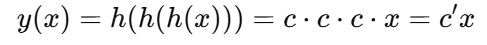

예를 들어, h(x) = cx와 같은 선형 함수를 활성화 함수로 사용하는 3층 신경망을 생각해보면, 출력은 y(x) = h(h(h(x)))가 된다. 이 계산은 결국 y(x) = c × c × c × x와 같이 정리되고, 다시 y(x) = a'x 형태의 단순한 선형 함수로 표현된다. 즉, 은닉층이 없는 신경망과 동일한 연산을 수행하는 것이다. 이와 같이 선형 함수를 사용하면 층을 쌓는 것의 의미가 사라지므로, 신경망의 표현력을 높이기 위해서는 반드시 비선형 함수를 활성화 함수로 사용해야 한다

# 3.2.7 ReLU 함수

3.2.7절에서는 ReLU 함수를 활성화 함수로 소개한다. 지금까지 계단 함수와 시그모이드 함수가 활성화 함수로 사용되는 예를 살펴보았지만, 최근에는 ReLU 함수가 신경망에서 주로 사용되고 있다.

ReLU는 "Rectified Linear Unit"의 줄임말로, 입력값이 0을 초과하면 그 값을 그대로 출력하고, 0 이하일 경우에는 0을 출력하는 함수이다. 함수의 정의는 간단하며, 그림 3-9에 나타난 것처럼 x축 기준으로 오른쪽은 직선, 왼쪽은 0으로 유지되는 형태이다.ReLU는 구현이 단순하고 계산이 빠르며, 시그모이드 함수보다 학습 과정에서 더 효율적인 성능을 보이는 경우가 많아 널리 사용되고 있다

**[그림 3-6]  ReLU 함수의 그래프**

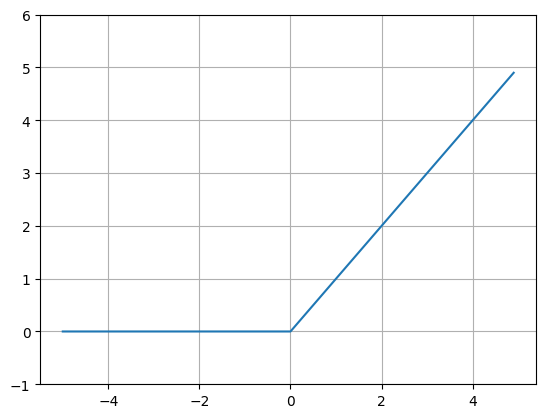

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU 함수 정의
def relu(x):
    return np.maximum(0, x)

# x 범위 지정
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

# 그래프 그리기
plt.plot(x, y)
plt.ylim(-1, 6)  # y축 범위 조정 (ReLU 출력 범위에 맞춤)
plt.grid(True)
plt.show()

ReLU 함수는 입력이 0을 초과하면 그 값을 그대로 출력하고, 0 이하이면 0을 출력하는 간단한 형태의 함수이다. 그림 3-9는 이러한 ReLU 함수의 그래프를 보여준다. 수식으로 표현하면 다음과 같다

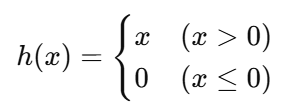

이 수식은 식 3.7로 제시되어 있으며, ReLU 함수는 그래프와 수식 모두에서 매우 단순하게 구성되어 있다. 따라서 구현도 매우 쉬우며, 다음과 같이 작성할 수 있다

In [2]:
def relu(x):
    return np.maximum(0, x)

여기서 사용된 np.maximum() 함수는 넘파이에서 제공하는 함수로, 두 입력값 중 큰 값을 반환한다. 이 함수를 사용하면 ReLU 함수의 조건 분기 없이 간단하게 구현할 수 있다. 이번 장에서는 주로 시그모이드 함수를 활성화 함수로 사용하지만, 이 책의 후반부에서는 ReLU 함수를 중심으로 설명하게 된다

# 3.3 다차원 배열의 계산

3.3절에서는 넘파이의 다차원 배열 계산 방법을 익혀 신경망 구현에 활용하는 것을 목표로 한다. 넘파이의 다차원 배열 연산을 잘 활용하면 신경망을 더욱 효율적으로 만들 수 있다. 따라서 이번 절에서는 먼저 다차원 배열에 대해 설명하고, 이후 이를 활용해 신경망을 구현할 예정이다

# 3.3.1 다차원 배열

3.3.1절에서는 다차원 배열의 기본 개념을 설명한다. 다차원 배열은 본질적으로 숫자의 집합이며, 숫자가 한 줄로 나열된 형태부터 직사각형 형태, 3차원 또는 그 이상의 차원으로 확장된 형태까지 모두를 포함한다. 이러한 배열을 통틀어 다차원 배열이라고 부른다. 예를 들어, 넘파이를 사용하여 1차원 배열을 만드는 코드는 다음과 같다

In [3]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)            # 출력: [1 2 3 4]
np.ndim(A)          # 결과: 1 (차원 수)
A.shape             # 결과: (4,) (형상)
A.shape[0]          # 결과: 4 (첫 번째 차원의 크기)

[1 2 3 4]


4

위 예시에서 np.ndim(A)는 배열 A의 차원 수를 반환하고, A.shape은 배열의 형상(각 차원의 크기)을 튜플로 반환한다. A.shape[0]은 첫 번째 차원의 크기를 의미하며, 이 경우 4가 된다

배열의 차원 수는 np.ndim() 함수를 이용해 확인할 수 있다. 배열의 형상은 배열 객체의 인스턴스 변수인 shape 속성을 통해 알 수 있다. 앞서 예제에서 사용한 배열 A는 1차원 배열이며, 총 4개의 원소를 가지고 있다. A.shape이 반환하는 값은 튜플이라는 점에 주의해야 한다. 이는 1차원 배열뿐 아니라, 다차원 배열의 경우에도 일관된 방식으로 형상을 표현하기 위해서이다. 예를 들어 2차원 배열은 (4, 3), 3차원 배열은 (4, 3, 2)와 같은 형식의 튜플을 반환한다. 따라서 1차원 배열의 경우에도 (4,)와 같이 튜플 형태로 표현된다. 이어서 2차원 배열을 작성하면 다음과 같다

In [11]:
import numpy as np

B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [12]:
print(np.ndim(B))   # 결과: 2 (2차원 배열)
print(B.shape)      # 결과: (3, 2)

2
(3, 2)


여기서 B는 3행 2열, 즉 3×2 배열이다. 이는 첫 번째 차원에 원소가 3개, 두 번째 차원에 원소가 2개 있다는 의미이다. 배열의 차원은 0부터 시작하는 인덱스를 기준으로, 첫 번째 차원은 0번째 차원, 두 번째 차원은 1번째 차원으로 불린다. 2차원 배열은 특히 행렬이라고 하며, 배열의 가로 방향을 행(row), 세로 방향을 **열(column)**이라고 부른다. 이러한 배열 구조는 그림 3-10에서 시각적으로 확인할 수 있다.

**[그림 3-10] 2차원 배열(행렬)의 행(가로)과 열(세로)**

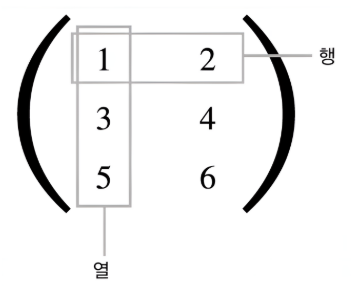

# 3.3.2 행렬의 곱

**[그림 3-11] 행렬의 곱 계산 방법**

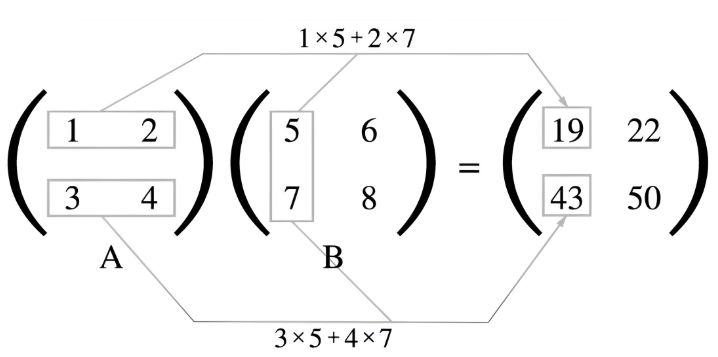

3.3.2절에서는 2차원 배열, 즉 행렬의 곱을 계산하는 방법에 대해 설명한다. 예를 들어 2×2 행렬 두 개를 곱하는 경우, 행렬 곱셈은 왼쪽 행렬의 행(가로)과 오른쪽 행렬의 열(세로)의 원소들을 각각 곱한 뒤 그 결과들을 더해 계산한다.이러한 방식으로 계산된 값은 새로운 배열의 각 원소가 된다. 예를 들어, 행렬 A의 첫 번째 행과 행렬 B의 첫 번째 열을 곱한 결과는 새로운 행렬의 첫 번째 행, 첫 번째 열의 원소가 된다. 마찬가지로 A의 두 번째 행과 B의 첫 번째 열을 곱한 결과는 결과 행렬의 두 번째 행, 첫 번째 열의 원소가 된다

참고로 이 책에서는 수식 속의 행렬을 굵은 글씨로 표기하여, 원소 하나로 이루어진 스칼라 값이나 파이썬 코드의 변수명과 구별하고자 한다. 예를 들어, 수식 속에서는 행렬 A, 변수명으로는 A처럼 구분된다. 이 계산은 파이썬과 넘파이를 이용해 다음과 같이 구현할 수 있다

In [13]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
print(A.shape)  # 출력: (2, 2)

B = np.array([[5, 6], [7, 8]])
print(B.shape)  # 출력: (2, 2)

(2, 2)
(2, 2)


In [14]:
result = np.dot(A, B)
print(result)

[[19 22]
 [43 50]]


여기서 np.dot() 함수는 두 행렬의 곱을 계산하는 함수이다. 결과로 나온 행렬은 2×2 행렬로, 각 원소는 대응하는 행과 열의 내적을 통해 계산된 값이다

A와 B는 2×2 행렬이며, 이 두 행렬의 곱은 넘파이의 np.dot() 함수를 사용하여 계산할 수 있다. np.dot() 함수는 입력이 1차원 배열일 경우 벡터의 내적을, 2차원 배열일 경우 행렬 곱을 계산한다.이때 주의할 점은 np.dot(A, B)와 np.dot(B, A)의 결과가 다를 수 있다는 것이다. 덧셈이나 곱셈 같은 일반적인 연산과 달리, 행렬의 곱에서는 피연산자의 순서가 결과에 영향을 준다. 앞에서는 2×2 행렬의 곱을 예로 보았지만, 형상이 다른 행렬 간의 곱도 같은 방식으로 계산할 수 있다. 예를 들어 다음과 같은 두 행렬이 있다고 하자

In [6]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])

이때 A는 2×3 행렬이고, B는 3×2 행렬이다. 이 두 행렬을 곱하면 다음과 같이 결과가 출력된다

In [8]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

이처럼 행렬 곱이 가능한 조건은 왼쪽 행렬 A의 열 수(1번째 차원의 크기)와 오른쪽 행렬 B의 행 수(0번째 차원의 크기)가 같아야 한다. 위 예에서는 두 값 모두 3이기 때문에 곱셈이 가능했다. 만약 이 조건이 맞지 않으면 행렬 곱은 계산할 수 없다. 예를 들어 A는 2×3 행렬이고, C라는 2×2 행렬이 있다고 하면, 이 둘을 곱하려고 할 때 다음과 같은 오류가 발생한다

In [15]:
C = np.array([[1, 2], [3, 4]])
np.dot(A, C)
# 오류:
# ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

array([[ 7, 10],
       [15, 22]])

이 오류는 A의 열 수가 3인데, C의 행 수가 2여서 서로 맞지 않기 때문에 발생한 것이다. 참고로 여기에서 A, B, C는 파이썬 코드 상의 변수명이기 때문에 굵게 표기하지 않는다. 수식 속에서의 행렬만 굵게 표기하여 코드와 구분하고 있다. 그리고 dot이라는 이름은 수학적으로 '스칼라곱(scalar product)', 또는 '점곱(dot product)'에서 유래된 것이다

**[그림 3-12] 행렬의 곱에서는 대응하는 차원의 원소 수를 일치시킨다**

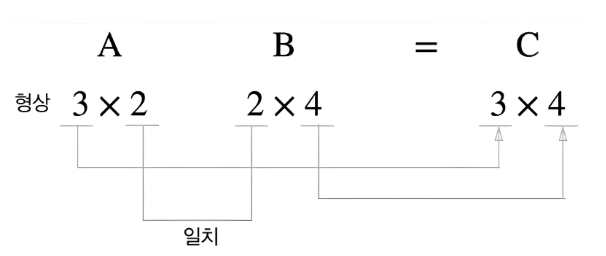

이 오류는 행렬 A의 1번째 차원(dim 1)과 행렬 C의 0번째 차원(dim 0)의 원소 수가 서로 다르기 때문에 발생한다. 배열에서 차원의 인덱스는 0부터 시작하며, 다차원 배열을 곱하려면 곱해지는 두 배열에서 대응하는 차원의 원소 수가 반드시 같아야 한다.

이를 그림 3-12를 통해 다시 정리할 수 있다. 예를 들어, 3×2 형상의 행렬 A와 2×4 형상의 행렬 B를 곱하면 3×4 형상의 행렬 C가 생성된다. 이때 중요한 것은 행렬 A의 열 수와 행렬 B의 행 수가 같아야 한다는 점이며, 결과 행렬 C의 형상은 A의 행 수와 B의 열 수로 결정된다.

이 원칙은 B가 1차원 배열일 때도 동일하게 적용된다. 그림 3-13은 A가 3×2 행렬이고 B가 길이 2의 1차원 배열일 때를 보여준다. 이 경우에도 A의 열 수와 B의 원소 수가 일치하므로 곱셈이 가능하며, 결과는 3개의 원소를 갖는 1차원 배열이 된다. 이를 파이썬으로 구현하면 다음과 같다

In [16]:
import numpy as np

A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)  # (3, 2)

B = np.array([7, 8])
print(B.shape)  # (2,)

print(np.dot(A, B))  # 출력: [23 53 83]

(3, 2)
(2,)
[23 53 83]


# 3.3.3 신경망에서의 행렬 곱

**[그림 3-14] 행렬의 곱으로 신경망의 계산을 수행한다**

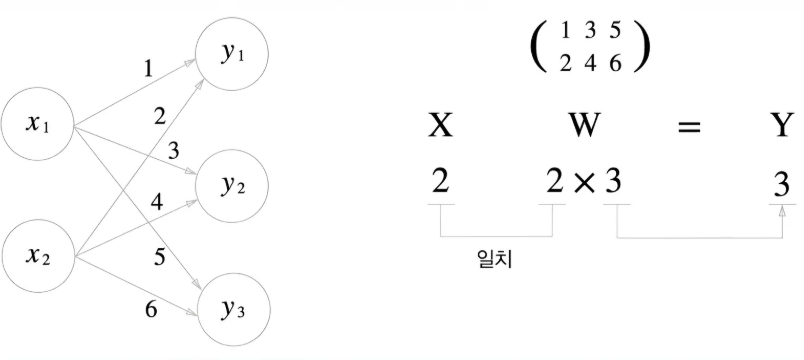

이제 신경망에서의 행렬 곱에 대해 살펴보자. 그림 3-14는 편향과 활성화 함수를 생략한 간단한 신경망을 보여준다. 이 예제에서는 입력값, 가중치, 출력값의 형상에 주의해야 하며, 특히 입력값 X와 가중치 W의 대응하는 차원의 원소 수가 같아야 행렬 곱이 가능하다

In [ ]:
X = np.array([1, 2])
print(X.shape)  # (2,)

W = np.array([[1, 3, 5],
              [2, 4, 6]])
print(W.shape)  # (2, 3)

Y = np.dot(X, W)
print(Y)  # 출력: [ 5 11 17 ]

이 결과는 신경망의 입력값 X와 가중치 W를 곱한 결과이며, 각 출력 뉴런에 대한 선형 결합의 결과값을 나타낸다

np.dot() 함수는 다차원 배열의 **스칼라곱(내적)**을 단번에 계산해주는 기능을 제공한다. 이를 활용하면 신경망의 출력값 𝑌 를 한 줄의 코드로 간단히 구할 수 있다. 출력값의 원소가 수백 개, 수천 개일지라도 np.dot() 함수는 한 번의 연산으로 모두 계산할 수 있다. 만약 np.dot()을 사용하지 않고 직접 각 원소를 계산하려 한다면, 하나하나 for문을 이용해야 하며 이는 매우 번거롭고 코드도 복잡해진다. 따라서 행렬 곱셈 기능은 신경망을 구현하는 데 있어서 핵심적인 도구라고 할 수 있다

# 3.4 3층 신경망 구현하기

이번에는 더 복잡한 구조의 신경망, 즉 3층 신경망을 구현해본다. 여기서 3층이란 은닉층의 개수가 아니라, 입력층부터 출력층까지의 총 4개 층 중 은닉층이 2개 있다는 의미이다. 입력층(0층)은 뉴런 2개, 첫 번째 은닉층(1층)은 뉴런 3개, 두 번째 은닉층(2층)은 뉴런 2개, 출력층(3층)은 뉴런 2개로 구성되어 있다. 이 신경망의 **순방향 처리(forward propagation)**를 구현하게 된다. 이를 구현하기 위해서는 넘파이의 다차원 배열을 적극적으로 활용한다. 넘파이 배열을 적절히 사용하면 매우 짧은 코드로도 전체 신경망의 계산 흐름을 완성할 수 있다.

**[그림 3-15] 3층 신경망: 입력층(0층)은 2개, 첫 번째 은닉층(1층)은 3개, 두 번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성된다**

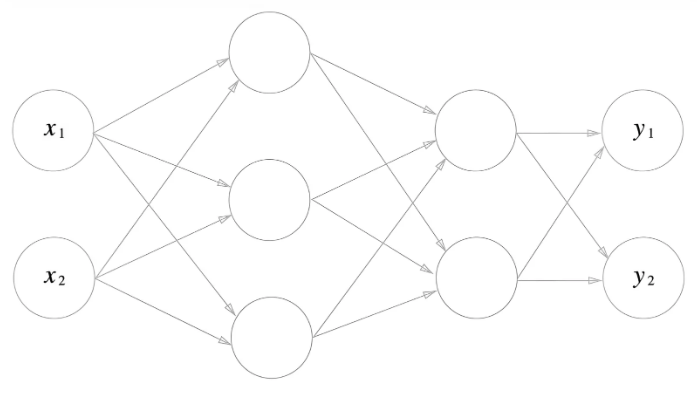

# 3.4.1 표기법 설명

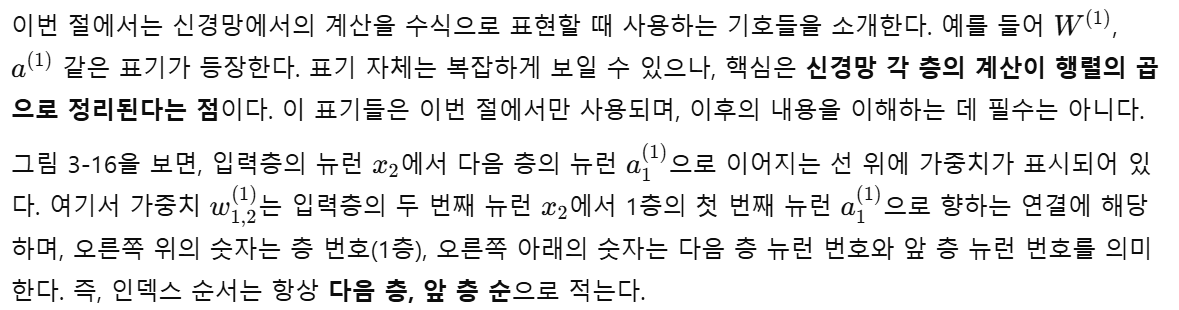

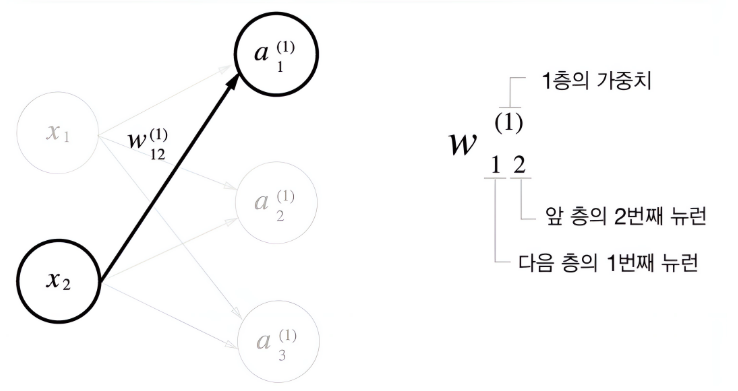

# 3.4.2 각 층의 신호 전달 구현하기
이번 절에서는 입력층에서 첫 번째 은닉층의 뉴런으로 전달되는 신호가 어떻게 계산되는지를 구현한다. 그림 3-17과 같이 입력값이 가중치와 곱해져 첫 번째 은닉층의 각 뉴런으로 전달되며, 이 계산 역시 행렬 곱으로 처리할 수 있다.이후 단계에서는 각 층에 **편향(bias)**과 **활성화 함수(activation function)**도 적용하여 신경망의 출력을 최종적으로 구하게 된다

**[그림 3-17] 입력층에서 1층으로 신호 전달**

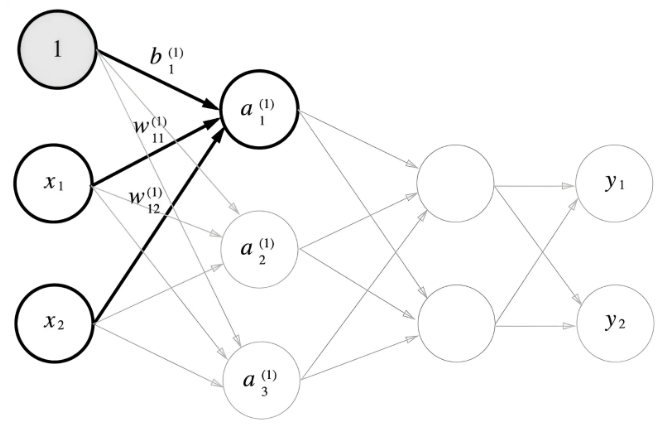

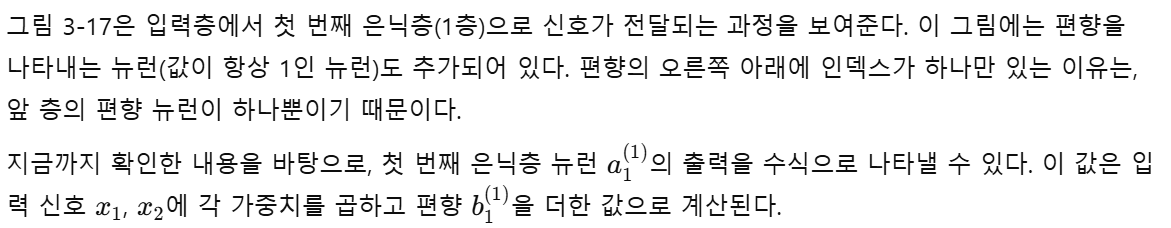

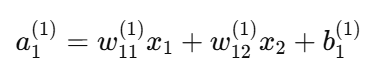

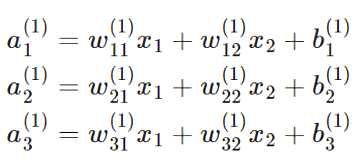

이 계산을 행렬 곱을 활용하면, 1층 전체의 가중치 계산을 다음과 같은 간단한 수식으로 표현할 수 있다

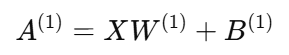

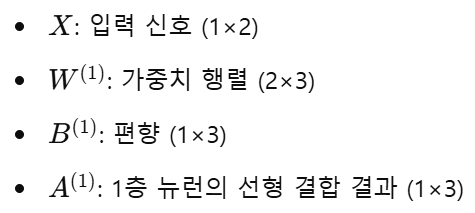

여기에서 각 행렬은 다음과 같은 형상을 가진다

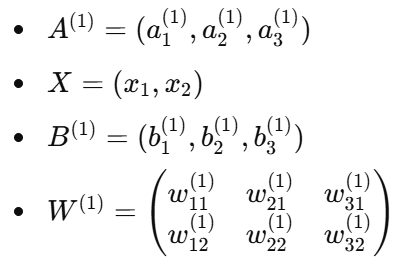

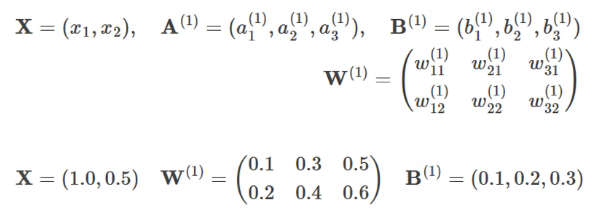

이제 넘파이의 다차원 배열을 사용하여 위의 수식, 즉 [식 3.9]를 구현할 수 있다. 입력 신호, 가중치, 편향은 적절한 값으로 설정하여 계산을 수행한다

In [17]:
import numpy as np

# 입력 X: (1, 2) 형상
X = np.array([1.0, 0.5])   # 예시 입력

# 가중치 W^(1): (2, 3) 형상
W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])

# 편향 B^(1): (1, 3) 형상
B1 = np.array([0.1, 0.2, 0.3])

# 신호 전달 (선형 결합)
A1 = np.dot(X, W1) + B1

print("A1 =", A1)  # 결과 출력

A1 = [0.3 0.7 1.1]


**[그림 3-18] 입력층에서 1층으로의 신호 전달**

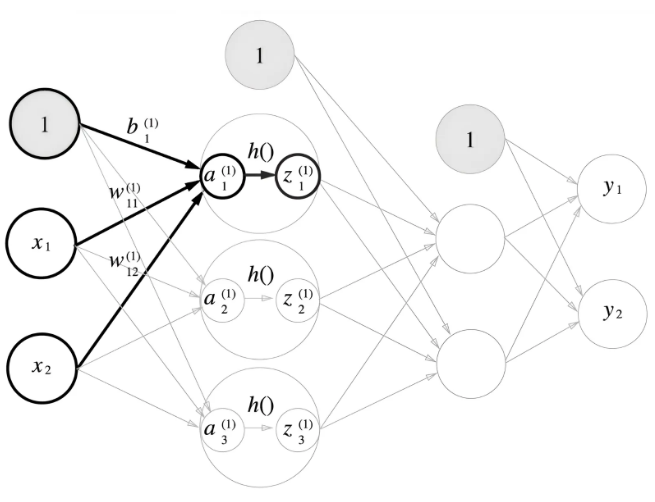

**[그림 3-19] 1층에서 2층으로의 신호 전달**

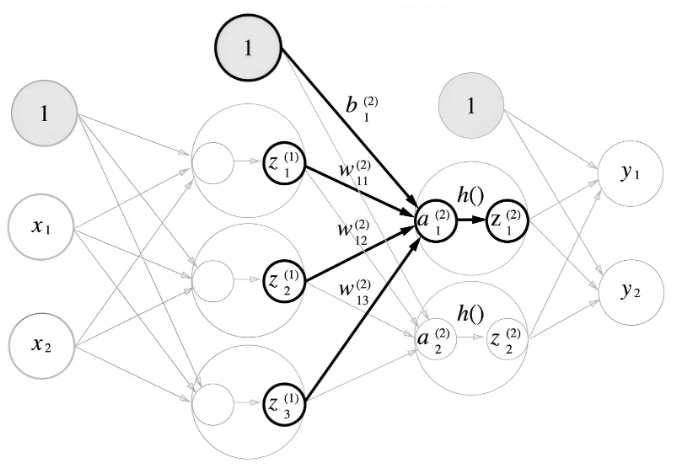

**[그림 3-20] 2층에서 출력층으로의 신호 전달**

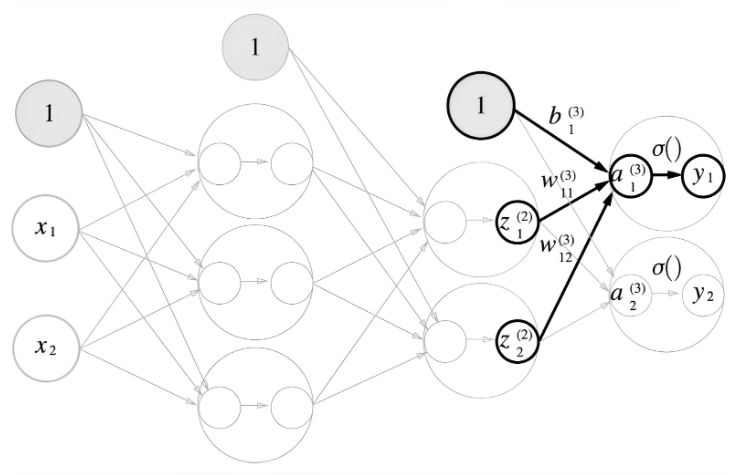

# 3.4.3 구현 정리
이로써 3층 신경망에 대한 설명이 모두 끝났다. 지금까지 구현한 내용을 정리하면 다음과 같다. 신경망 구현에서는 관례적으로 **가중치(weight)**는 W1, W2처럼 대문자로 표기하고, **편향(bias)**이나 중간 결과는 모두 소문자로 표기한다.먼저, 신경망의 가중치와 편향을 초기화하는 함수 init_network()를 정의한다. 이 함수는 각 층의 가중치와 편향을 넘파이 배열로 만들어 딕셔너리 network에 저장하고 반환한다.

In [18]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],
                              [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],
                              [0.2, 0.5],
                              [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],
                              [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

그 다음은 입력 신호를 받아 출력값으로 변환하는 순방향 처리 함수인 forward() 함수이다. 이 함수는 입력층부터 출력층까지의 계산을 순서대로 수행하며, 각 층의 가중치와 편향을 사용한다

In [19]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

이제 위에서 정의한 두 함수를 이용해 신경망을 실행할 수 있다. init_network()로 매개변수를 초기화하고, forward() 함수로 입력 x를 넣어 결과를 구한다

In [21]:
!pip install numpy

import numpy as np

def sigmoid(x):
  """Sigmoid activation function."""
  return 1 / (1 + np.exp(-x))

def identity_function(x):
  """Identity function."""
  return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],
                              [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2']

여기서 사용된 sigmoid()와 identity_function()은 각각 시그모이드 함수와 항등 함수이며, 출력층에서는 항등 함수를 사용하였다. 항등 함수는 입력을 그대로 출력하는 함수로, 다음과 같이 정의된다

In [22]:
def identity_function(x):
    return x

이처럼 init_network()는 신경망의 가중치와 편향을 설정하는 역할을 하고, forward() 함수는 입력을 받아 순방향으로 출력을 계산하는 역할을 한다. 함수 이름을 forward라고 한 이유는 입력에서 출력으로 신호가 순방향(forward) 으로 전달되기 때문이다. 나중에 역방향(backward) 처리도 배우게 될 것이다. 이로써 신경망의 순방향 구현은 완성되었다. 넘파이의 다차원 배열을 잘 활용하면 매우 간결하고 효율적으로 신경망을 구성할 수 있다

# 3.5 출력층 설계하기

신경망은 **분류(classification)**와 회귀(regression) 문제 모두에 사용할 수 있다. 하지만 문제의 유형에 따라 출력층에서 사용하는 활성화 함수가 달라진다. 일반적으로 회귀 문제에서는 항등 함수를, 분류 문제에서는 소프트맥스 함수를 사용한다.머신러닝 문제는 크게 두 가지로 나눌 수 있다. 분류 문제는 데이터가 어떤 클래스에 속하는지를 판별하는 문제이며, 예를 들어 사진 속 인물의 성별을 분류하는 문제가 여기에 속한다. 반면 회귀 문제는 연속적인 수치를 예측하는 문제이다. 예를 들어 사진 속 인물의 몸무게를 예측하는 문제는 회귀 문제에 해당한다.출력층의 활성화 함수 선택은 문제의 성질에 맞게 이루어져야 하며, 이에 대해서는 다음 절에서 더 자세히 다룰 예정이다

